In [45]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from flipside import Flipside
flipside = Flipside("023b83a2-e411-4849-a961-3742c87bc9c9", "https://api-v2.flipsidecrypto.xyz")

# FTT Token Price

First, we get FTT token price.

In [46]:
sql = """
SELECT hour, price
FROM ethereum.core.fact_hourly_token_prices
WHERE token_address = '0x50d1c9771902476076ecfc8b2a83ad6b9355a4c9'
ORDER BY hour
"""

query_result_set = flipside.query(sql, page_number = 1, page_size = 50000)

current_page_number = 1
page_size = 50000
total_pages = 2

# All the data will be stored in a list called "all_rows"
all_rows = []

while current_page_number <= total_pages:
  results = flipside.get_query_results(
    query_result_set.query_id,
    page_number=current_page_number,
    page_size=page_size
  )

  total_pages = results.page.totalPages
  if results.records:
      all_rows = all_rows + results.records
  
  current_page_number += 1

# Merge all rows to a dataframe
df = pd.DataFrame(all_rows)
df.drop(columns = ['__row_index'], inplace = True)
df['hour'] = pd.to_datetime(df['hour'])
df.head(10)

,hour,price
0,2021-05-05 19:00:00+00:00,57.7096
1,2021-05-05 20:00:00+00:00,57.7096
2,2021-05-05 21:00:00+00:00,57.7096
3,2021-05-05 22:00:00+00:00,57.7096
4,2021-05-05 23:00:00+00:00,57.7096
5,2021-05-06 00:00:00+00:00,57.7096
6,2021-05-06 01:00:00+00:00,57.7096
7,2021-05-06 02:00:00+00:00,57.7096
8,2021-05-06 03:00:00+00:00,57.7096
9,2021-05-06 04:00:00+00:00,57.7096


Plot price of FTT token.

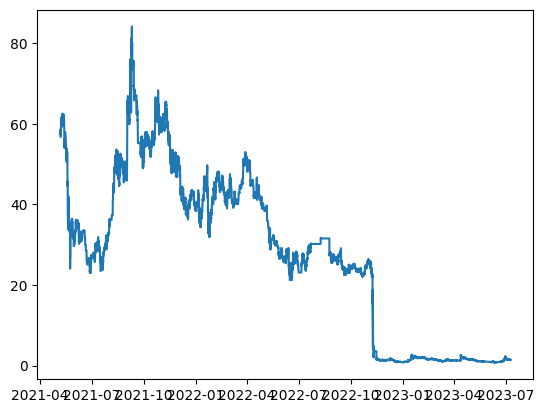

In [47]:
plt.plot(df['hour'], df['price'])
plt.show()

Check for period of FTX collapse.

In [48]:
df.loc[(df['hour'] > '2022-11-08') & (df['hour'] < '2022-11-10')]

,hour,price
13230,2022-11-08 01:00:00+00:00,21.95
13231,2022-11-08 02:00:00+00:00,21.98
13232,2022-11-08 03:00:00+00:00,18.19
13233,2022-11-08 04:00:00+00:00,18.26
13234,2022-11-08 05:00:00+00:00,15.40
13235,2022-11-08 06:00:00+00:00,15.71
13236,2022-11-08 07:00:00+00:00,17.16
13237,2022-11-08 08:00:00+00:00,18.16
13238,2022-11-08 09:00:00+00:00,18.27
13239,2022-11-08 10:00:00+00:00,17.70


In [49]:
df.to_csv("/Users/zhicong/Dropbox/DEXs/FTX_token/ftx_token_price.csv", index=False)

# FTT Token Holders

Now, we are interested in the addresses that are heavily affected by the bankruptcy of FTX.

In [43]:
sql = """
SELECT block_number, block_timestamp, user_address, balance
FROM ethereum.core.fact_token_balances
WHERE contract_address = '0x50d1c9771902476076ecfc8b2a83ad6b9355a4c9' AND 
      balance > 0 AND
      (block_number, user_address) IN
        (SELECT MAX(block_number), user_address
         FROM ethereum.core.fact_token_balances
         WHERE contract_address = '0x50d1c9771902476076ecfc8b2a83ad6b9355a4c9' AND
               block_timestamp <= '2022-11-08T02:00:00Z'
         GROUP BY user_address)
ORDER BY BLOCK_NUMBER
"""

query_result_set = flipside.query(sql, page_number = 1, page_size = 50000)

current_page_number = 1
page_size = 50000
total_pages = 2

# All the data will be stored in a list called "all_rows"
all_rows = []

while current_page_number <= total_pages:
  results = flipside.get_query_results(
    query_result_set.query_id,
    page_number=current_page_number,
    page_size=page_size
  )

  total_pages = results.page.totalPages
  if results.records:
      all_rows = all_rows + results.records
  
  current_page_number += 1

# Merge all rows to a dataframe
df = pd.DataFrame(all_rows)
df.drop(columns = ['__row_index'], inplace = True)
df['balance'] = df['balance']/(10**18)
df.head(10)

,block_number,block_timestamp,user_address,balance
0,8248604,2019-07-29T23:59:56.000Z,0x3e33292b58036858b3f39345591077033c1d765c,0.34375
1,8261511,2019-07-31T23:59:51.000Z,0xccc8a9372962a9138570e0da1fdce569dc3c2d3d,0.1
2,8280837,2019-08-03T23:59:51.000Z,0x48585e6756f0a81c736ab711c59d6b252ea9bf81,31.25
3,8300167,2019-08-06T23:59:59.000Z,0xd202dd30921a95eef92d83b265af691b74a2b946,1.0
4,8300167,2019-08-06T23:59:59.000Z,0xe427dabb0f96a7f9838e1acc61cb1e86b78c8c0b,1.0
5,8300167,2019-08-06T23:59:59.000Z,0xbf3d39c03b8eb95ff447a2a4e9fe3d80365a9ecb,4.0
6,8306649,2019-08-07T23:59:55.000Z,0xf5a2a24dcf34a00cfcb7cf179710fc3d475013bf,5.0
7,8313033,2019-08-08T23:59:17.000Z,0xa2898c557d436bec21ce9ee8d23d1631da061be2,2.0
8,8319453,2019-08-09T23:59:53.000Z,0x6ec954abef8a91c1815d0b3007d5bee80ec44f5b,9.0
9,8332372,2019-08-11T23:59:58.000Z,0xa0769c822a677bb4a963a49c74350861e27db8ff,8.5


In [44]:
df.to_csv("/Users/zhicong/Dropbox/DEXs/Data/FTX_token/ftx_token_balance.csv", index=False)